In [16]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PS08 Galaxy Shape Model

In [17]:
# randomly orient galaxies wrt the line-of-sight
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
orientation_model = RandomAlignment()

# calculate projected axis ratios
from galaxy_shapes.shape_models.shape_model_components import ProjectedShapes
projected_shape_model = ProjectedShapes()

# intialize luminosity function
from lss_observations.luminosity_functions import Blanton_2003_phi
phi = Blanton_2003_phi()

In [18]:
"""
Here I define a function that returns a galaxy sample 
with projected shapes, magnitudes, and weights using the model componenets.
"""

def obs_func(shape_model, orientation_model, projected_shape_model, mag_lim,
             morphology='elliptical', size=1e6, extinction_model=None):
    """
    """
    size=int(size)
    
    # calculate axis ratios
    b_to_a = shape_model.assign_b_to_a(size=size)
    c_to_a, b_to_a, c_to_b = shape_model.assign_c_to_a(b_to_a=b_to_a)
    
    # set random orientations
    major_v, inter_v, minor_v = orientation_model.assign_orientation(size=size)
   
    # calculate projected axis ratios
    proj_b_to_a, theta = projected_shape_model.assign_projected_b_to_a(minor_axis=minor_v,
                                              inter_axis=inter_v,
                                              major_axis=major_v,
                                              b_to_a = b_to_a,
                                              c_to_a = c_to_a)
    
    # calculate intrinsic magnitudes
    mag = np.random.uniform(low=-24, high=mag_lim, size=size)
    
    # calculate weight
    w = phi(mag)
    
    # calculate dust extinction
    if morphology=='spiral':
        y = c_to_a
        dm = extinction_model.extinction_model(theta, y)
    else:
        dm = np.zeros(size)
    mag = mag + dm
    
    return proj_b_to_a, mag, w

## Elliptical Galaxies

In [19]:
# initialize shape models
from galaxy_shapes.shape_models.shape_model_components import PS08Shapes
elliptical_model_all = PS08Shapes(morphology='elliptical', sample='all')
elliptical_model_1   = PS08Shapes(morphology='elliptical', sample='luminosity_sample_1')
elliptical_model_2   = PS08Shapes(morphology='elliptical', sample='luminosity_sample_2')
elliptical_model_3   = PS08Shapes(morphology='elliptical', sample='luminosity_sample_3')
elliptical_model_4   = PS08Shapes(morphology='elliptical', sample='luminosity_sample_4')

In [20]:
elliptical_model_3.param_dict['shape_sigma_centrals'] = 1.6
elliptical_model_1.param_dict['shape_mu_centrals'] = -3.3

elliptical_model_1.param_dict['shape_gamma_centrals'] = 1.0 - 0.41
elliptical_model_2.param_dict['shape_gamma_centrals'] = 1.0 - 0.36
elliptical_model_3.param_dict['shape_gamma_centrals'] = 1.0 - 0.56
elliptical_model_4.param_dict['shape_gamma_centrals'] = 1.0 - 0.76

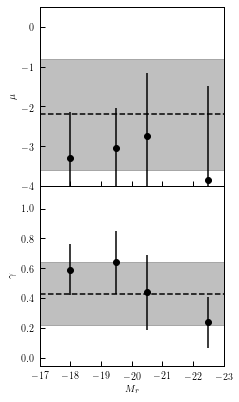

In [21]:
"""
here I plot the parameter trends.
This reproduices figure 3 in PS08.
"""

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.3,6.6))
fig.subplots_adjust(hspace=0, wspace=0)

ax = axes[0]
ax.set_ylim([-4,0.5])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\mu$')

# all
mu = elliptical_model_all.param_dict['shape_mu_centrals']
sigma = elliptical_model_all.param_dict['shape_sigma_centrals']
ax.plot([-17,-24],[mu,mu],'--',color='black')
ax.fill_between([-17,-24],[mu-sigma,mu-sigma],[mu+sigma,mu+sigma], color='black', alpha=0.25)

# sample 1
mu = elliptical_model_1.param_dict['shape_mu_centrals']
sigma = elliptical_model_1.param_dict['shape_sigma_centrals']
ax.errorbar([-18],[mu],sigma,fmt='o',color='black')

# sample 2
mu = elliptical_model_2.param_dict['shape_mu_centrals']
sigma = elliptical_model_2.param_dict['shape_sigma_centrals']
ax.errorbar([-19.5],[mu],sigma,fmt='o',color='black')

# sample 3
mu = elliptical_model_3.param_dict['shape_mu_centrals']
sigma = elliptical_model_3.param_dict['shape_sigma_centrals']
ax.errorbar([-20.5],[mu],sigma,fmt='o',color='black')

# sample 4
mu = elliptical_model_4.param_dict['shape_mu_centrals']
sigma = elliptical_model_4.param_dict['shape_sigma_centrals']
ax.errorbar([-22.5],[mu],sigma,fmt='o',color='black')

ax = axes[1]
ax.set_ylim([-0.05,1.15])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\gamma$')
ax.set_xlabel(r'$M_r$')

# all
gamma = elliptical_model_all.param_dict['shape_gamma_centrals']
sigma = elliptical_model_all.param_dict['shape_sigma_gamma_centrals']
ax.plot([-17,-24],[gamma,gamma],'--',color='black')
ax.fill_between([-17,-24],[gamma-sigma,gamma-sigma],[gamma+sigma,gamma+sigma], color='black', alpha=0.25)

# sample 1
gamma = elliptical_model_1.param_dict['shape_gamma_centrals']
sigma = elliptical_model_1.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-18],[gamma],sigma,fmt='o',color='black')

# sample 2
gamma = elliptical_model_2.param_dict['shape_gamma_centrals']
sigma = elliptical_model_2.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-19.5],[gamma],sigma,fmt='o',color='black')

# sample 3
gamma = elliptical_model_3.param_dict['shape_gamma_centrals']
sigma = elliptical_model_3.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-20.5],[gamma],sigma,fmt='o',color='black')

# sample 4
gamma = elliptical_model_4.param_dict['shape_gamma_centrals']
sigma = elliptical_model_4.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-22.5],[gamma],sigma,fmt='o',color='black')

plt.show()

In [22]:
# calculate projected shapes, magnitudes, and weights
proj_b_to_a_all, m_all, w_all = obs_func(elliptical_model_all, orientation_model,
                                         projected_shape_model, mag_lim=-17)
proj_b_to_a_1, m_1, w_1 = obs_func(elliptical_model_1, orientation_model,
                                         projected_shape_model, mag_lim=-17)
proj_b_to_a_2, m_2, w_2 = obs_func(elliptical_model_2, orientation_model,
                                         projected_shape_model, mag_lim=-19)
proj_b_to_a_3, m_3, w_3 = obs_func(elliptical_model_3, orientation_model,
                                         projected_shape_model, mag_lim=-20)
proj_b_to_a_4, m_4, w_4 = obs_func(elliptical_model_4, orientation_model,
                                         projected_shape_model, mag_lim=-21)

In [23]:
# calculate the distribution of shapes
bins = np.linspace(0,1,40)

mask = (m_all<-17)
e = 1 - proj_b_to_a_all
counts_all = np.histogram(e, bins=bins, weights=w_all)[0]
counts_all = counts_all/np.sum(counts_all)/np.diff(bins)

mask = (m_1<-17) & (m_1>-19)
e = 1 - proj_b_to_a_1
counts_1 = np.histogram(e[mask], bins=bins, weights=w_1[mask])[0]
counts_1 = counts_1/np.sum(counts_1)/np.diff(bins)

mask = (m_2<-19) & (m_2>-20)
e = 1 - proj_b_to_a_2
counts_2 = np.histogram(e[mask], bins=bins, weights=w_2[mask])[0]
counts_2 = counts_2/np.sum(counts_2)/np.diff(bins)

mask = (m_3<-20) & (m_3>-21)
e = 1 - proj_b_to_a_3
counts_3 = np.histogram(e[mask], bins=bins, weights=w_3[mask])[0]
counts_3 = counts_3/np.sum(counts_3)/np.diff(bins)

mask = (m_4<-21) & (m_4>-24)
e = 1 - proj_b_to_a_4
counts_4 = np.histogram(e[mask], bins=bins, weights=w_4[mask])[0]
counts_4 = counts_4/np.sum(counts_4)/np.diff(bins)

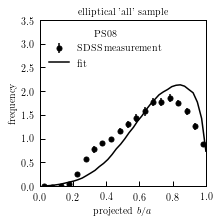

In [24]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../../data/PS08/figure_4.dat', format='ascii')
x = 1-t['b/a']
y = t['normalized_frequency']
err = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
ax.set_title("elliptical 'all' sample")
l1, = ax.plot(1-bins[:-1], counts_all, color='black')
p1 = ax.errorbar(1-x, y, yerr=err, fmt='o', ms=5, color='black')
ax.set_xlim([0,1])
ax.set_ylim([0,3.5])
ax.set_xlabel(r'${\rm projected}~b/a$')
ax.set_ylabel('frequency')
plt.legend([p1,l1],['SDSS measurement','fit'], 
           title = 'PS08', frameon=False, loc='upper left')
plt.show()

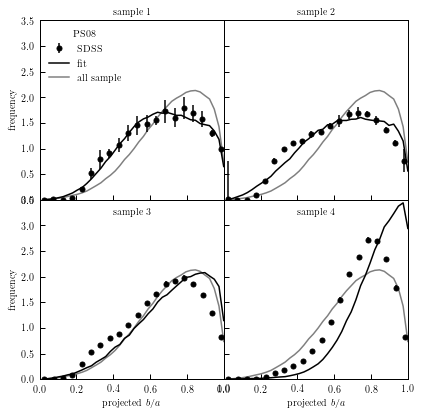

In [25]:
# load PS08 data
from astropy.table import Table

# open elliptical PS08 data
t = Table.read('../../data/PS08/figure_5a.dat', format='ascii')
x1 = 1-t['b/a']
y1 = t['normalized_frequency']
err1 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../../data/PS08/figure_5b.dat', format='ascii')
x2 = 1-t['b/a']
y2 = t['normalized_frequency']
err2 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../../data/PS08/figure_5c.dat', format='ascii')
x3 = 1-t['b/a']
y3 = t['normalized_frequency']
err3 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../../data/PS08/figure_5d.dat', format='ascii')
x4 = 1-t['b/a']
y4 = t['normalized_frequency']
err4 = np.fabs(t['error_+'] - t['error_-'])/2.0


colors = plt.cm.cool(np.linspace(0,1,4))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6.6,6.6))
fig.subplots_adjust(hspace=0, wspace=0)

l1, = ax1.plot(1-bins[:-1], counts_1, color='black')
p1 = ax1.errorbar(1-x1, y1, yerr=err1, fmt='o', ms=5, color='black')
l2, = ax1.plot(1-bins[:-1], counts_all, '-', color='black', alpha=0.5)
ax1.set_xlim([0,1])
ax1.set_ylim([0,3.5])
ax1.set_ylabel('frequency')
ax1.set_title('sample 1')
ax1.legend([p1,l1,l2],['SDSS','fit','all sample'],
           title='PS08', loc='upper left', frameon=False)

l1, = ax2.plot(1-bins[:-1], counts_2, color='black')
p1 = ax2.errorbar(1-x2, y2, yerr=err2, fmt='o', ms=5, color='black')
l1, = ax2.plot(1-bins[:-1], counts_all, '-', color='black', alpha=0.5)
ax2.set_xlim([0,1])
ax2.set_ylim([0,3.5])
ax2.set_title('sample 2')

l1, = ax3.plot(1-bins[:-1], counts_3, color='black')
p1 = ax3.errorbar(1-x3, y3, yerr=err3, fmt='o', ms=5, color='black')
l1, = ax3.plot(1-bins[:-1], counts_all, '-', color='black', alpha=0.5)
ax3.set_xlim([0,1])
ax3.set_ylim([0,3.5])
ax3.set_xlabel(r'${\rm projected}~ b/a$')
ax3.set_ylabel('frequency')
ax3.set_title('sample 3', pad=-15)

l1, = ax4.plot(1-bins[:-1], counts_4, color='black')
p1 = ax4.errorbar(1-x4, y4, yerr=err4, fmt='o', ms=5, color='black')
l1, = ax4.plot(1-bins[:-1], counts_all, '-', color='black', alpha=0.5)
ax4.set_xlim([0,1])
ax4.set_ylim([0,3.5])
ax4.set_xlabel(r'${\rm projected}~ b/a$')
ax4.set_title('sample 4', pad=-15)

plt.show()

## Disk Galaxies

In [7]:
from galaxy_shapes.shape_models.shape_model_components import PS08Shapes
spiral_model_all= PS08Shapes(morphology='spiral', sample='all')
spiral_model_1  = PS08Shapes(morphology='spiral', sample='luminosity_sample_1')
spiral_model_2  = PS08Shapes(morphology='spiral', sample='luminosity_sample_2')
spiral_model_3  = PS08Shapes(morphology='spiral', sample='luminosity_sample_3')
spiral_model_4  = PS08Shapes(morphology='spiral', sample='luminosity_sample_4')

In [8]:
spiral_model_all.param_dict['shape_gamma_centrals'] = 1.0 - spiral_model_all.param_dict['shape_gamma_centrals']
spiral_model_1.param_dict['shape_gamma_centrals'] = 1.0 - spiral_model_1.param_dict['shape_gamma_centrals']
spiral_model_2.param_dict['shape_gamma_centrals'] = 1.0 - spiral_model_2.param_dict['shape_gamma_centrals']
spiral_model_3.param_dict['shape_gamma_centrals'] = 1.0 - spiral_model_3.param_dict['shape_gamma_centrals']
spiral_model_4.param_dict['shape_gamma_centrals'] = 1.0 - spiral_model_4.param_dict['shape_gamma_centrals']

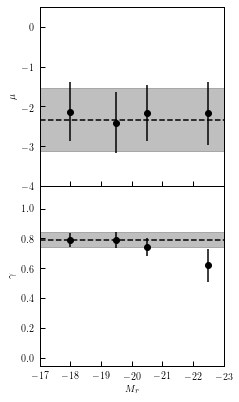

In [9]:
"""
here I plot the parameter trends.
This reproduices figure 3 in PS08.
"""

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.3,6.6))
fig.subplots_adjust(hspace=0, wspace=0)

ax = axes[0]
ax.set_ylim([-4,0.5])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\mu$')

# all
mu = spiral_model_all.param_dict['shape_mu_centrals']
sigma = spiral_model_all.param_dict['shape_sigma_centrals']
ax.plot([-17,-24],[mu,mu],'--',color='black')
ax.fill_between([-17,-24],[mu-sigma,mu-sigma],[mu+sigma,mu+sigma], color='black', alpha=0.25)

# sample 1
mu = spiral_model_1.param_dict['shape_mu_centrals']
sigma = spiral_model_1.param_dict['shape_sigma_centrals']
ax.errorbar([-18],[mu],sigma,fmt='o',color='black')

# sample 2
mu = spiral_model_2.param_dict['shape_mu_centrals']
sigma = spiral_model_2.param_dict['shape_sigma_centrals']
ax.errorbar([-19.5],[mu],sigma,fmt='o',color='black')

# sample 3
mu = spiral_model_3.param_dict['shape_mu_centrals']
sigma = spiral_model_3.param_dict['shape_sigma_centrals']
ax.errorbar([-20.5],[mu],sigma,fmt='o',color='black')

# sample 4
mu = spiral_model_4.param_dict['shape_mu_centrals']
sigma = spiral_model_4.param_dict['shape_sigma_centrals']
ax.errorbar([-22.5],[mu],sigma,fmt='o',color='black')

ax = axes[1]
ax.set_ylim([-0.05,1.15])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\gamma$')
ax.set_xlabel(r'$M_r$')

# all
gamma = spiral_model_all.param_dict['shape_gamma_centrals']
sigma = spiral_model_all.param_dict['shape_sigma_gamma_centrals']
ax.plot([-17,-24],[gamma,gamma],'--',color='black')
ax.fill_between([-17,-24],[gamma-sigma,gamma-sigma],[gamma+sigma,gamma+sigma], color='black', alpha=0.25)

# sample 1
gamma = spiral_model_1.param_dict['shape_gamma_centrals']
sigma = spiral_model_1.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-18],[gamma],sigma,fmt='o',color='black')

# sample 2
gamma = spiral_model_2.param_dict['shape_gamma_centrals']
sigma = spiral_model_2.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-19.5],[gamma],sigma,fmt='o',color='black')

# sample 3
gamma = spiral_model_3.param_dict['shape_gamma_centrals']
sigma = spiral_model_3.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-20.5],[gamma],sigma,fmt='o',color='black')

# sample 4
gamma = spiral_model_4.param_dict['shape_gamma_centrals']
sigma = spiral_model_4.param_dict['shape_sigma_gamma_centrals']
ax.errorbar([-22.5],[gamma],sigma,fmt='o',color='black')

plt.show()

In [10]:
from galaxy_shapes.shape_models.extinction_model_components import PS08DustExtinction
extinction_model_all = PS08DustExtinction(gal_type='centrals', sample='all')
extinction_model_1 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_1')
extinction_model_2 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_2')
extinction_model_3 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_3')
extinction_model_4 = PS08DustExtinction(gal_type='centrals', sample='luminosity_sample_4')

In [11]:
from lss_observations.luminosity_functions import Blanton_2003_phi
phi = Blanton_2003_phi()

In [12]:
proj_b_to_a_all, m_all, w_all = obs_func(spiral_model_all, orientation_model, projected_shape_model, mag_lim=-17, morphology='spiral', extinction_model=extinction_model_all)
proj_b_to_a_1, m_1, w_1 = obs_func(spiral_model_1, orientation_model, projected_shape_model, mag_lim=-17, morphology='spiral', extinction_model=extinction_model_1)
proj_b_to_a_2, m_2, w_2 = obs_func(spiral_model_2, orientation_model, projected_shape_model, mag_lim=-19, morphology='spiral', extinction_model=extinction_model_2)
proj_b_to_a_3, m_3, w_3 = obs_func(spiral_model_3, orientation_model, projected_shape_model, mag_lim=-20, morphology='spiral', extinction_model=extinction_model_3)
proj_b_to_a_4, m_4, w_4 = obs_func(spiral_model_4, orientation_model, projected_shape_model, mag_lim=-21, morphology='spiral', extinction_model=extinction_model_4)

In [13]:
# calculate the distribution of shapes
bins = np.linspace(0,1,20)
bin_centers = (bins[:-1]+bins[1:])/2.0

e = 1 - proj_b_to_a_all
mask = (m_all < -17)
counts_all = np.histogram(e[mask], bins=bins, weights=w_all[mask])[0]
counts_all = counts_all/np.sum(counts_all)/np.diff(bins)
counts_allall = np.histogram(e, bins=bins)[0]
counts_allall = counts_allall/np.sum(counts_allall)/np.diff(bins)

e = 1 - proj_b_to_a_1
mask = (m_1 < -17) & (m_1>-19)
counts_1 = np.histogram(e[mask], bins=bins, weights=w_1[mask])[0]
counts_1 = counts_1/np.sum(counts_1)/np.diff(bins)
counts_11 = np.histogram(e, bins=bins)[0]
counts_11 = counts_11/np.sum(counts_11)/np.diff(bins)

e = 1 - proj_b_to_a_2
mask = (m_2 < -19) & (m_1>-20)
counts_2 = np.histogram(e[mask], bins=bins, weights=w_2[mask])[0]
counts_2 = counts_2/np.sum(counts_2)/np.diff(bins)
counts_22 = np.histogram(e, bins=bins)[0]
counts_22 = counts_22/np.sum(counts_22)/np.diff(bins)

e = 1 - proj_b_to_a_3
mask = (m_3 < -20) & (m_1>-21)
counts_3 = np.histogram(e[mask], bins=bins, weights=w_3[mask])[0]
counts_3 = counts_3/np.sum(counts_3)/np.diff(bins)
counts_33 = np.histogram(e, bins=bins)[0]
counts_33 = counts_33/np.sum(counts_33)/np.diff(bins)

e = 1 - proj_b_to_a_4
mask = (m_4 < -21) & (m_1>-24)
counts_4 = np.histogram(e[mask], bins=bins, weights=w_4[mask])[0]
counts_4 = counts_4/np.sum(counts_4)/np.diff(bins)
counts_44 = np.histogram(e, bins=bins)[0]
counts_44 = counts_44/np.sum(counts_44)/np.diff(bins)

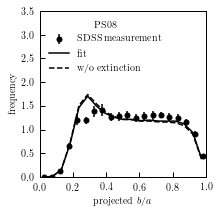

In [14]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../../data/PS08/figure_7.dat', format='ascii')
x = 1-t['b/a']
y = t['normalized_frequency']
err = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(1-bin_centers, counts_all, color='black')
l2, = ax.plot(1-bin_centers, counts_allall, '--', color='black')
p1 = ax.errorbar(1-x, y, yerr=err, fmt='o', ms=5, color='black')
ax.set_xlim([0,1])
ax.set_ylim([0,3.5])
ax.set_xlabel(r'${\rm projected}~b/a$')
ax.set_ylabel('frequency')
plt.legend([p1,l1,l2],['SDSS measurement','fit','w/o extinction'], 
           title = 'PS08', frameon=False, loc='upper left')
plt.show()

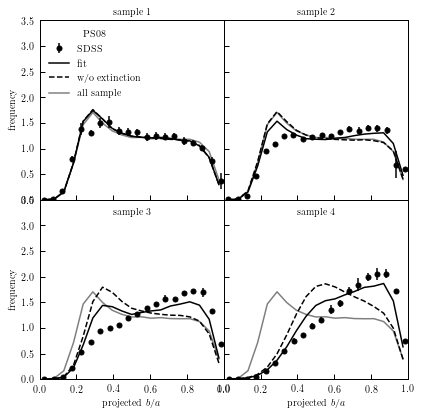

In [15]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../../data/PS08/figure_8a.dat', format='ascii')
x1 = 1-t['b/a']
y1 = t['normalized_frequency']
err1 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../../data/PS08/figure_8b.dat', format='ascii')
x2 = 1-t['b/a']
y2 = t['normalized_frequency']
err2 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../../data/PS08/figure_8c.dat', format='ascii')
x3 = 1-t['b/a']
y3 = t['normalized_frequency']
err3 = np.fabs(t['error_+'] - t['error_-'])/2.0

t = Table.read('../../data/PS08/figure_8d.dat', format='ascii')
x4 = 1-t['b/a']
y4 = t['normalized_frequency']
err4 = np.fabs(t['error_+'] - t['error_-'])/2.0


colors = plt.cm.cool(np.linspace(0,1,4))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6.6,6.6))
fig.subplots_adjust(hspace=0, wspace=0)

l0, = ax1.plot(1-bin_centers, counts_all, color='black', alpha=0.5)
l1, = ax1.plot(1-bin_centers, counts_1, color='black')
l2, = ax1.plot(1-bin_centers, counts_11, '--', color='black')
p1 = ax1.errorbar(1-x1, y1, yerr=err1, fmt='o', ms=5, color='black')
ax1.set_xlim([0,1])
ax1.set_ylim([0,3.5])
ax1.set_ylabel('frequency')
ax1.legend([p1,l1,l2,l0],['SDSS','fit','w/o extinction','all sample'],
           title='PS08', loc='upper left', frameon=False)
ax1.set_title('sample 1')

l0, = ax2.plot(1-bin_centers, counts_all, color='black', alpha=0.5)
l1, = ax2.plot(1-bin_centers, counts_2, color='black')
l1, = ax2.plot(1-bin_centers, counts_22, '--', color='black')
p1 = ax2.errorbar(1-x2, y2, yerr=err2, fmt='o', ms=5, color='black')
ax2.set_xlim([0,1])
ax2.set_ylim([0,3.5])
ax2.set_title('sample 2')

l0, = ax3.plot(1-bin_centers, counts_all, color='black', alpha=0.5)
l1, = ax3.plot(1-bin_centers, counts_3, color='black')
l1, = ax3.plot(1-bin_centers, counts_33, '--', color='black')
p1 = ax3.errorbar(1-x3, y3, yerr=err3, fmt='o', ms=5, color='black')
ax3.set_xlim([0,1])
ax3.set_ylim([0,3.5])
ax3.set_xlabel(r'${\rm projected}~b/a$')
ax3.set_ylabel('frequency')
ax3.set_title('sample 3', pad=-15)

l0, = ax4.plot(1-bin_centers, counts_all, color='black', alpha=0.5)
l1, = ax4.plot(1-bin_centers, counts_4, color='black')
l1, = ax4.plot(1-bin_centers, counts_44, '--', color='black')
p1 = ax4.errorbar(1-x4, y4, yerr=err4, fmt='o', ms=5, color='black')
ax4.set_xlim([0,1])
ax4.set_ylim([0,3.5])
ax4.set_xlabel(r'${\rm projected}~b/a$')
ax4.set_title('sample 4', pad=-15)

plt.show()

NameError: name 'c_to_a' is not defined